<a href="https://colab.research.google.com/github/deepsharma26/SIRT1_Main/blob/Data_collection_and_exploratory_data_analysis/Copy_of_CDD_ML_Part_1_%262_Bioactivity_Data_Concised_SIRT1_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 1] Download Bioactivity Data (Concised version)**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 1**, we will be performing Data Collection and Pre-Processing from the ChEMBL Database.

Note for this Concised Version:
* Redundant code cells were deleted.
* Code cells for saving files to Google Drive has been deleted.

---

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
  Using cached easydict-1.13-py3-none-any.whl (6.8 kB)
ERROR: Could not find a version that satisfies the requirement requests-cache~=1.2 (from chembl_webresource_client) (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.2.0, 0.2.1, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 1.0.0a0, 1.0.0a1, 1.0.0a2, 1.0.0b0, 1.0.0b1, 1.0.0, 1.0.1, 1.1.0, 1.1.1)
ERROR: No matching distribution found for requests-cache~=1.2 (from chembl_webresource_client)


## **Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for Sirtuin1 (SIRT1)**

In [ ]:
# Target search for SIRT1
target = new_client.target
target_query = target.search('SIRT1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,NAD-dependent deacetylase sirtuin 1,12.0,False,CHEMBL4506,"[{'accession': 'Q96EB6', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cereblon/NAD-dependent protein deacetylase sir...,11.0,False,CHEMBL4296132,"[{'accession': 'Q96EB6', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


### **Select and retrieve bioactivity data for *Human Sirtuin1 (SIRT1)* (zeorth entry)**

We will assign the zeroth entry (which corresponds to the target protein, *Human SIRT1*) to the ***selected_target*** variable

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL4506'

Here, we will retrieve only bioactivity data for *Human SIRT1* (CHEMBL4506) that are reported as pChEMBL values.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1653881,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.098
1,None,None,1653885,[],CHEMBL859693,Inhibitory activity against human SIRT1 by rad...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,1.29
2,None,None,1653895,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.205
3,None,None,1653899,[],CHEMBL859693,Inhibitory activity against human SIRT1 by rad...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,2.5
4,None,None,1653908,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25656033,[],CHEMBL5372270,Inhibition of recombinant SIRT1 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,95.86
1258,None,None,25665840,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5374950,Inhibition of recombinant human Sirt1 (134 to ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
1259,None,Not Determined,25665841,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5374950,Inhibition of recombinant human Sirt1 (134 to ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,None,None,None,None
1260,None,Not Determined,25665842,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5374950,Inhibition of recombinant human Sirt1 (134 to ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,None,None,None,None


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [ ]:
df.to_csv('SIRT1_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-71-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1653881,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.098
1,None,None,1653885,[],CHEMBL859693,Inhibitory activity against human SIRT1 by rad...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,1.29
2,None,None,1653895,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.205
3,None,None,1653899,[],CHEMBL859693,Inhibitory activity against human SIRT1 by rad...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,2.5
4,None,None,1653908,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625619,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364135,Inhibition of Sirtuin-1 (unknown origin) incub...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,2.5
1255,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25626692,[],CHEMBL5364481,Inhibition of recombinant SIRT1 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,112.6
1256,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25656032,[],CHEMBL5372270,Inhibition of recombinant SIRT1 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,21.9
1257,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25656033,[],CHEMBL5372270,Inhibition of recombinant SIRT1 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,95.86


In [ ]:
len(df2.canonical_smiles.unique())

933

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1653881,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.098
2,None,None,1653895,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.205
4,None,None,1653908,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,1.47
6,None,None,1653921,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,0.124
10,None,None,1653937,[],CHEMBL859689,Inhibitory activity against recombinant human ...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625618,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364135,Inhibition of Sirtuin-1 (unknown origin) incub...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,1.2
1254,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625619,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364135,Inhibition of Sirtuin-1 (unknown origin) incub...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,2.5
1255,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25626692,[],CHEMBL5364481,Inhibition of recombinant SIRT1 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,112.6
1256,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25656032,[],CHEMBL5372270,Inhibition of recombinant SIRT1 (unknown origi...,B,None,None,BAO_0000190,...,Homo sapiens,NAD-dependent deacetylase sirtuin 1,9606,None,None,IC50,uM,UO_0000065,None,21.9


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL420311,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,98.0
2,CHEMBL115600,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O,205.0
4,CHEMBL112265,NC(=O)C1CCCc2c1[nH]c1ccccc21,1470.0
6,CHEMBL446446,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21,124.0
10,CHEMBL171137,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,100000.0
...,...,...,...
1253,CHEMBL4793948,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1,1200.0
1254,CHEMBL4749004,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O,2500.0
1255,CHEMBL5416344,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...,112600.0
1256,CHEMBL5424599,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...,21900.0


Saves dataframe to CSV file

In [ ]:
df3.to_csv('SIRT1_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active or inactive**
The bioactivity data is in the IC50 unit. First, convet IC50 value from nm into μM. The compounds with IC50 higher than 1 μM were considered inactive, and the ones with IC50 below or equal to 1 μM were considered active.

In [ ]:
df4 = pd.read_csv('SIRT1_02_bioactivity_data_preprocessed.csv')

In [ ]:
# Load CSV file (replace with your actual file path)
df = pd.read_csv("/content/SIRT1_02_bioactivity_data_preprocessed.csv")  # Update the file name as needed

# Convert IC50 from nM to μM (1 μM = 1000 nM)
df["standard_value"] = df["standard_value"] / 1000

# Define Activity Label: Active (≤1 μM) / Inactive (>1 μM)
df["Class"] = df["standard_value"].apply(lambda x: "Active" if x <= 1 else "Inactive")

# Save the updated dataset with new columns
df.to_csv("SIRT1_03_bioactivity_data_preprocessed.csv", index=False)

# Display confirmation message
print("Updated CSV file saved as 'SIRT1_03_bioactivity_data_preprocessed.csv'")
print(df.head())  # Show first few rows

Updated CSV file saved as 'SIRT1_03_bioactivity_data_preprocessed.csv'
  molecule_chembl_id                    canonical_smiles  standard_value  \
0       CHEMBL420311    NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21           0.098   
1       CHEMBL115600     Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O           0.205   
2       CHEMBL112265        NC(=O)C1CCCc2c1[nH]c1ccccc21           1.470   
3       CHEMBL446446   NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21           0.124   
4       CHEMBL171137  CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21         100.000   

      Class  
0    Active  
1    Active  
2  Inactive  
3    Active  
4  Inactive  


Saves dataframe to CSV file


#Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis
Chanin Nantasenamat

'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 2, we will be performing Descriptor Calculation and Exploratory Data Analysis.

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-02-22 09:04:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   115MB/s    in 0.7s    

2025-02-22 09:04:09 (115 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-hand

Load bioactivity data

In [2]:
import pandas as pd
df = pd.read_csv('/content/SIRT1_03_bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,Class
0,CHEMBL420311,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,0.098,Active
1,CHEMBL115600,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O,0.205,Active
2,CHEMBL112265,NC(=O)C1CCCc2c1[nH]c1ccccc21,1.470,Inactive
3,CHEMBL446446,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21,0.124,Active
4,CHEMBL171137,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,100.000,Inactive
...,...,...,...,...
928,CHEMBL4793948,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1,1.200,Inactive
929,CHEMBL4749004,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O,2.500,Inactive
930,CHEMBL5416344,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...,112.600,Inactive
931,CHEMBL5424599,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...,21.900,Inactive


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,Class,canonical_smiles
0,CHEMBL420311,0.098,Active,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21
1,CHEMBL115600,0.205,Active,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O
2,CHEMBL112265,1.470,Inactive,NC(=O)C1CCCc2c1[nH]c1ccccc21
3,CHEMBL446446,0.124,Active,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21
4,CHEMBL171137,100.000,Inactive,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21
...,...,...,...,...
928,CHEMBL4793948,1.200,Inactive,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1
929,CHEMBL4749004,2.500,Inactive,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O
930,CHEMBL5416344,112.600,Inactive,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...
931,CHEMBL5424599,21.900,Inactive,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...


#Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

#Import libraries

In [6]:
!pip install rdkit-pypi
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski

     |████████████████████████████████| 29.2 MB 26.9 MB/s 


#Calculate descriptors

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,248.713,2.72650,2.0,1.0
1,228.295,2.38152,2.0,1.0
2,214.268,2.07310,2.0,1.0
3,262.740,3.11660,2.0,1.0
4,277.751,3.80430,1.0,2.0
...,...,...,...,...
928,331.375,4.58290,3.0,2.0
929,330.387,3.99920,3.0,2.0
930,582.130,4.24410,5.0,7.0
931,501.016,3.75300,6.0,8.0


#Combine DataFrames
Let's take a look at the 2 DataFrames that will be combined.

In [9]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,248.713,2.72650,2.0,1.0
1,228.295,2.38152,2.0,1.0
2,214.268,2.07310,2.0,1.0
3,262.740,3.11660,2.0,1.0
4,277.751,3.80430,1.0,2.0
...,...,...,...,...
928,331.375,4.58290,3.0,2.0
929,330.387,3.99920,3.0,2.0
930,582.130,4.24410,5.0,7.0
931,501.016,3.75300,6.0,8.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,Class
0,CHEMBL420311,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,0.098,Active
1,CHEMBL115600,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O,0.205,Active
2,CHEMBL112265,NC(=O)C1CCCc2c1[nH]c1ccccc21,1.470,Inactive
3,CHEMBL446446,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21,0.124,Active
4,CHEMBL171137,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,100.000,Inactive
...,...,...,...,...
928,CHEMBL4793948,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1,1.200,Inactive
929,CHEMBL4749004,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O,2.500,Inactive
930,CHEMBL5416344,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...,112.600,Inactive
931,CHEMBL5424599,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...,21.900,Inactive


Now, let's combine the 2 DataFrame

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,Class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL420311,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,0.098,Active,248.713,2.72650,2.0,1.0
1,CHEMBL115600,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O,0.205,Active,228.295,2.38152,2.0,1.0
2,CHEMBL112265,NC(=O)C1CCCc2c1[nH]c1ccccc21,1.470,Inactive,214.268,2.07310,2.0,1.0
3,CHEMBL446446,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21,0.124,Active,262.740,3.11660,2.0,1.0
4,CHEMBL171137,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,100.000,Inactive,277.751,3.80430,1.0,2.0
...,...,...,...,...,...,...,...,...
928,CHEMBL4793948,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1,1.200,Inactive,331.375,4.58290,3.0,2.0
929,CHEMBL4749004,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O,2.500,Inactive,330.387,3.99920,3.0,2.0
930,CHEMBL5416344,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...,112.600,Inactive,582.130,4.24410,5.0,7.0
931,CHEMBL5424599,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...,21.900,Inactive,501.016,3.75300,6.0,8.0


#Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [13]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis=1)

    return x

In [14]:
df_combined.standard_value.describe()

,standard_value
count,933.000000
mean,76.672965
std,299.659827
min,0.000000
25%,3.030000
50%,22.600000
75%,70.900000
max,6521.000000


In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,Class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL420311,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,Active,248.713,2.72650,2.0,1.0,0.098
1,CHEMBL115600,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O,Active,228.295,2.38152,2.0,1.0,0.205
2,CHEMBL112265,NC(=O)C1CCCc2c1[nH]c1ccccc21,Inactive,214.268,2.07310,2.0,1.0,1.470
3,CHEMBL446446,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21,Active,262.740,3.11660,2.0,1.0,0.124
4,CHEMBL171137,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,Inactive,277.751,3.80430,1.0,2.0,100.000
...,...,...,...,...,...,...,...,...
928,CHEMBL4793948,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1,Inactive,331.375,4.58290,3.0,2.0,1.200
929,CHEMBL4749004,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O,Inactive,330.387,3.99920,3.0,2.0,2.500
930,CHEMBL5416344,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...,Inactive,582.130,4.24410,5.0,7.0,112.600
931,CHEMBL5424599,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...,Inactive,501.016,3.75300,6.0,8.0,21.900


In [19]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,933.000000
mean,76.672965
std,299.659827
min,0.000000
25%,3.030000
50%,22.600000
75%,70.900000
max,6521.000000


In [20]:
df_final = pIC50(df_norm)
df_final

<ipython-input-13-01d0ca105605>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL420311,NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,Active,248.713,2.72650,2.0,1.0,10.008774
1,CHEMBL115600,Cc1ccc2[nH]c3c(c2c1)CCCC3C(N)=O,Active,228.295,2.38152,2.0,1.0,9.688246
2,CHEMBL112265,NC(=O)C1CCCc2c1[nH]c1ccccc21,Inactive,214.268,2.07310,2.0,1.0,8.832683
3,CHEMBL446446,NC(=O)C1CCCCc2c1[nH]c1ccc(Cl)cc21,Active,262.740,3.11660,2.0,1.0,9.906578
4,CHEMBL171137,CCOC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21,Inactive,277.751,3.80430,1.0,2.0,7.000000
...,...,...,...,...,...,...,...,...
928,CHEMBL4793948,O=C(Nc1ccccc1)Nc1ccc(NC(=O)c2ccccc2)cc1,Inactive,331.375,4.58290,3.0,2.0,8.920819
929,CHEMBL4749004,O=C(NCCc1c[nH]c2ccccc12)c1cc2ccccc2cc1O,Inactive,330.387,3.99920,3.0,2.0,8.602060
930,CHEMBL5416344,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2Cl)ncc1C(=O)N...,Inactive,582.130,4.24410,5.0,7.0,6.948462
931,CHEMBL5424599,O=C(O)CCNC(=S)NCCCNc1nc(Nc2ccccc2)nc(Nc2ccccc2...,Inactive,501.016,3.75300,6.0,8.0,7.659556


In [21]:
df_final.pIC50.describe()

,pIC50
count,933.000000
mean,inf
std,NaN
min,5.185686
25%,7.149354
50%,7.645892
75%,8.518557
max,inf


Let's write this to CSV file.

In [22]:
df_final.to_csv('SIRT1_04_bioactivity_data_3class_pIC50.csv')

#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

# Calculating Pairwise Tanimoto Coefficients Using MACCS Fingerprints in RDKit
The Tanimoto coefficient is widely used to measure the structural similarity between chemical compounds based on their fingerprints. Here, we will calculate the pairwise Tanimoto similarity using MACCS keys fingerprints from RDKit and visualize the results.

In [23]:
!pip install rdkit seaborn pandas matplotlib

     |████████████████████████████████| 29.5 MB 1.3 MB/s 
     |████████████████████████████████| 293 kB 46.9 MB/s 
     |████████████████████████████████| 11.2 MB 27.9 MB/s 
     |████████████████████████████████| 1.1 MB 46.2 MB/s 
     |████████████████████████████████| 965 kB 47.7 MB/s 
     |████████████████████████████████| 104 kB 45.5 MB/s 


# Computing Pairwise Tanimoto Similarity

In [24]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, DataStructs
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (assuming CSV file with SMILES column)
df = pd.read_csv("/content/SIRT1_04_bioactivity_data_3class_pIC50.csv")  # Replace with actual file name

# Convert SMILES to RDKit Molecules
df["Mol"] = df["canonical_smiles"].apply(lambda x: Chem.MolFromSmiles(x))

# Generate MACCS Fingerprints
df["MACCS"] = df["Mol"].apply(lambda x: MACCSkeys.GenMACCSKeys(x) if x is not None else None)

# Drop molecules that couldn't be converted
df = df.dropna(subset=["MACCS"]).reset_index(drop=True)

# Compute Pairwise Tanimoto Similarity
num_compounds = len(df)
similarity_matrix = np.zeros((num_compounds, num_compounds))

for i in range(num_compounds):
    for j in range(num_compounds):
        if i <= j:  # Avoid redundant calculations
            similarity = DataStructs.FingerprintSimilarity(df["MACCS"][i], df["MACCS"][j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Since it's symmetric

# Convert to DataFrame
sim_df = pd.DataFrame(similarity_matrix, index=df["molecule_chembl_id"], columns=df["molecule_chembl_id"])

# Save similarity matrix as CSV
sim_df.to_csv("SIRT1_05_bioactivity_data_tanimoto_similarity_matrix.csv")


#Histogram of Pairwise Tanimoto Similarity Scores

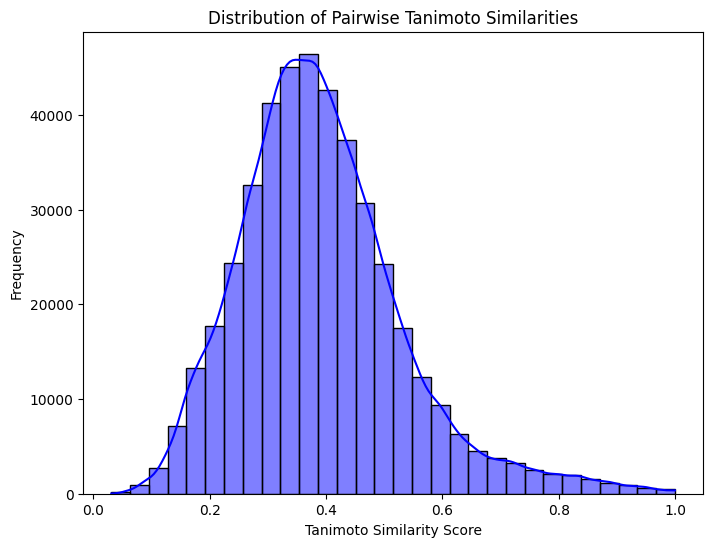

In [25]:
sim_values = similarity_matrix[np.triu_indices(num_compounds, k=1)]  # Extract upper triangle, excluding diagonal

plt.figure(figsize=(8, 6))
sns.histplot(sim_values, bins=30, kde=True, color="blue", edgecolor="black")  # <-- Add black border
plt.xlabel("Tanimoto Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Pairwise Tanimoto Similarities")

# Save as JPEG
plt.savefig("tanimoto_similarity_histogram.jpeg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()

plt.show()

#Plotting the Lipinksi voilation form the input dataset

📊 Corrected bar plot saved as 'SIRT1_lipinski_grouped.jpeg'


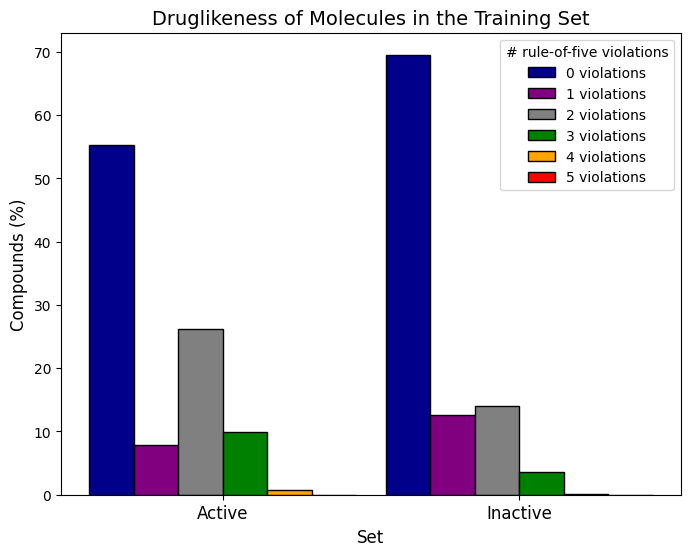

📂 Data saved as 'SIRT1_lipinski_grouped.csv'


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
input_file = "/content/SIRT1_04_bioactivity_data_3class_pIC50.csv"
df = pd.read_csv(input_file)

# Define Lipinski violations based on thresholds
df["Violations"] = (
    (df["MW"] > 500).astype(int) +
    (df["LogP"] > 5).astype(int) +
    (df["NumHDonors"] > 5).astype(int) +
    (df["NumHAcceptors"] > 10).astype(int)
)

# Count violations for each class (Active, Inactive)
violation_counts = df.groupby(["Class", "Violations"]).size().unstack(fill_value=0)

# Convert counts to percentages
violation_percentage = violation_counts.div(violation_counts.sum(axis=1), axis=0) * 100

# Define colors for each violation category
colors = ["darkblue", "purple", "gray", "green", "orange", "red"]
violation_labels = [0, 1, 2, 3, 4, 5]  # Rule-of-five violations

# Set up grouped bar positions
bar_width = 0.15
x_labels = ["Active", "Inactive"]
x = np.arange(len(x_labels))  # X positions for Active & Inactive

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each violation count, grouped within Active & Inactive
for i, violation in enumerate(violation_labels):
    ax.bar(x - bar_width * 2.5 + (i * bar_width),
           [violation_percentage.loc["Active", violation] if violation in violation_percentage.loc["Active"] else 0,
            violation_percentage.loc["Inactive", violation] if violation in violation_percentage.loc["Inactive"] else 0],
           width=bar_width, color=colors[i], edgecolor="black", label=f"{violation} violations")

# Customize labels and title
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=12)
ax.set_ylabel("Compounds (%)", fontsize=12)
ax.set_xlabel("Set", fontsize=12)
ax.set_title("Druglikeness of Molecules in the Training Set", fontsize=14)

# Add legend with violation numbers
ax.legend(title="# rule-of-five violations", loc="upper right")

# Save as JPEG
output_file = "SIRT1_lipinski_grouped.jpeg"
plt.savefig(output_file, format="jpeg", dpi=300, bbox_inches="tight")
print(f"📊 Corrected bar plot saved as '{output_file}'")

# Show plot
plt.show()

# Save Data as CSV
csv_filename = "SIRT1_lipinski_grouped.csv"
violation_percentage.to_csv(csv_filename)
print(f"📂 Data saved as '{csv_filename}'")




Save the results fo the above plot in csv format

#Distribution of pIC50 vlaues

Corrected bar plot saved as 'Distribution_of_pIC50_values.jpeg'


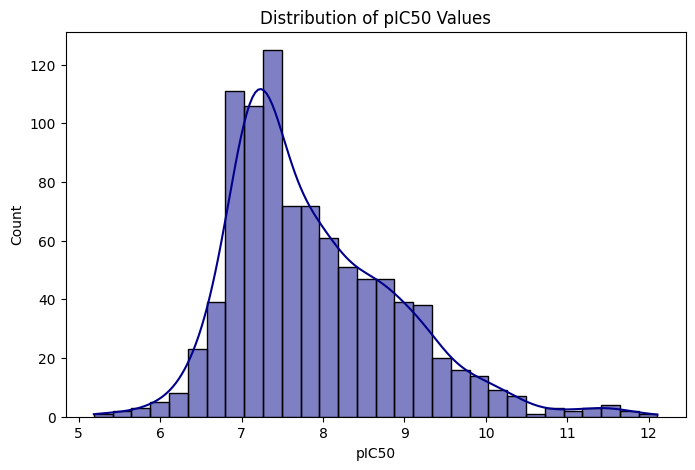

In [27]:
# Distribution of pIC50 values
plt.figure(figsize=(8, 5))
sns.histplot(df['pIC50'], bins=30, kde=True, color="darkblue", edgecolor="black")
plt.title("Distribution of pIC50 Values")
# Save as JPEG
output_file = "Distribution_of_pIC50_values.jpeg"
plt.savefig(output_file, format="jpeg", dpi=300, bbox_inches="tight")
print(f"Corrected bar plot saved as '{output_file}'")

plt.show()

#Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

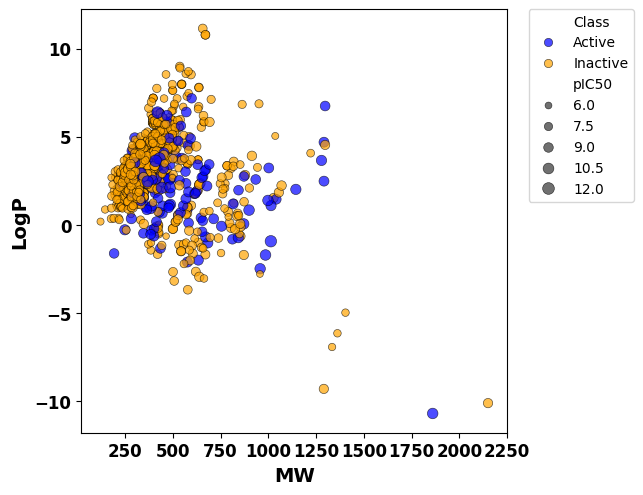

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_2class = df_final[df_final['Class'].isin(['Active', 'Inactive'])]
df_2class['pIC50'] = df_2class['pIC50'].replace([np.inf, -np.inf], np.nan)
df_2class['pIC50'] = df_2class['pIC50'].fillna(df_2class['pIC50'].mean())
custom_palette = {"Active": "blue", "Inactive": "orange"}
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='Class', size='pIC50',
                edgecolor='black', palette=custom_palette, alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.rcParams['figure.dpi'] = 300

plt.savefig('plot_MW_vs_LogP.pdf', format='pdf', bbox_inches='tight')
plt.show()


#Box plots
#pIC50 value

<ipython-input-30-1fd61d334365>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='pIC50', data=df_2class, palette=custom_palette)


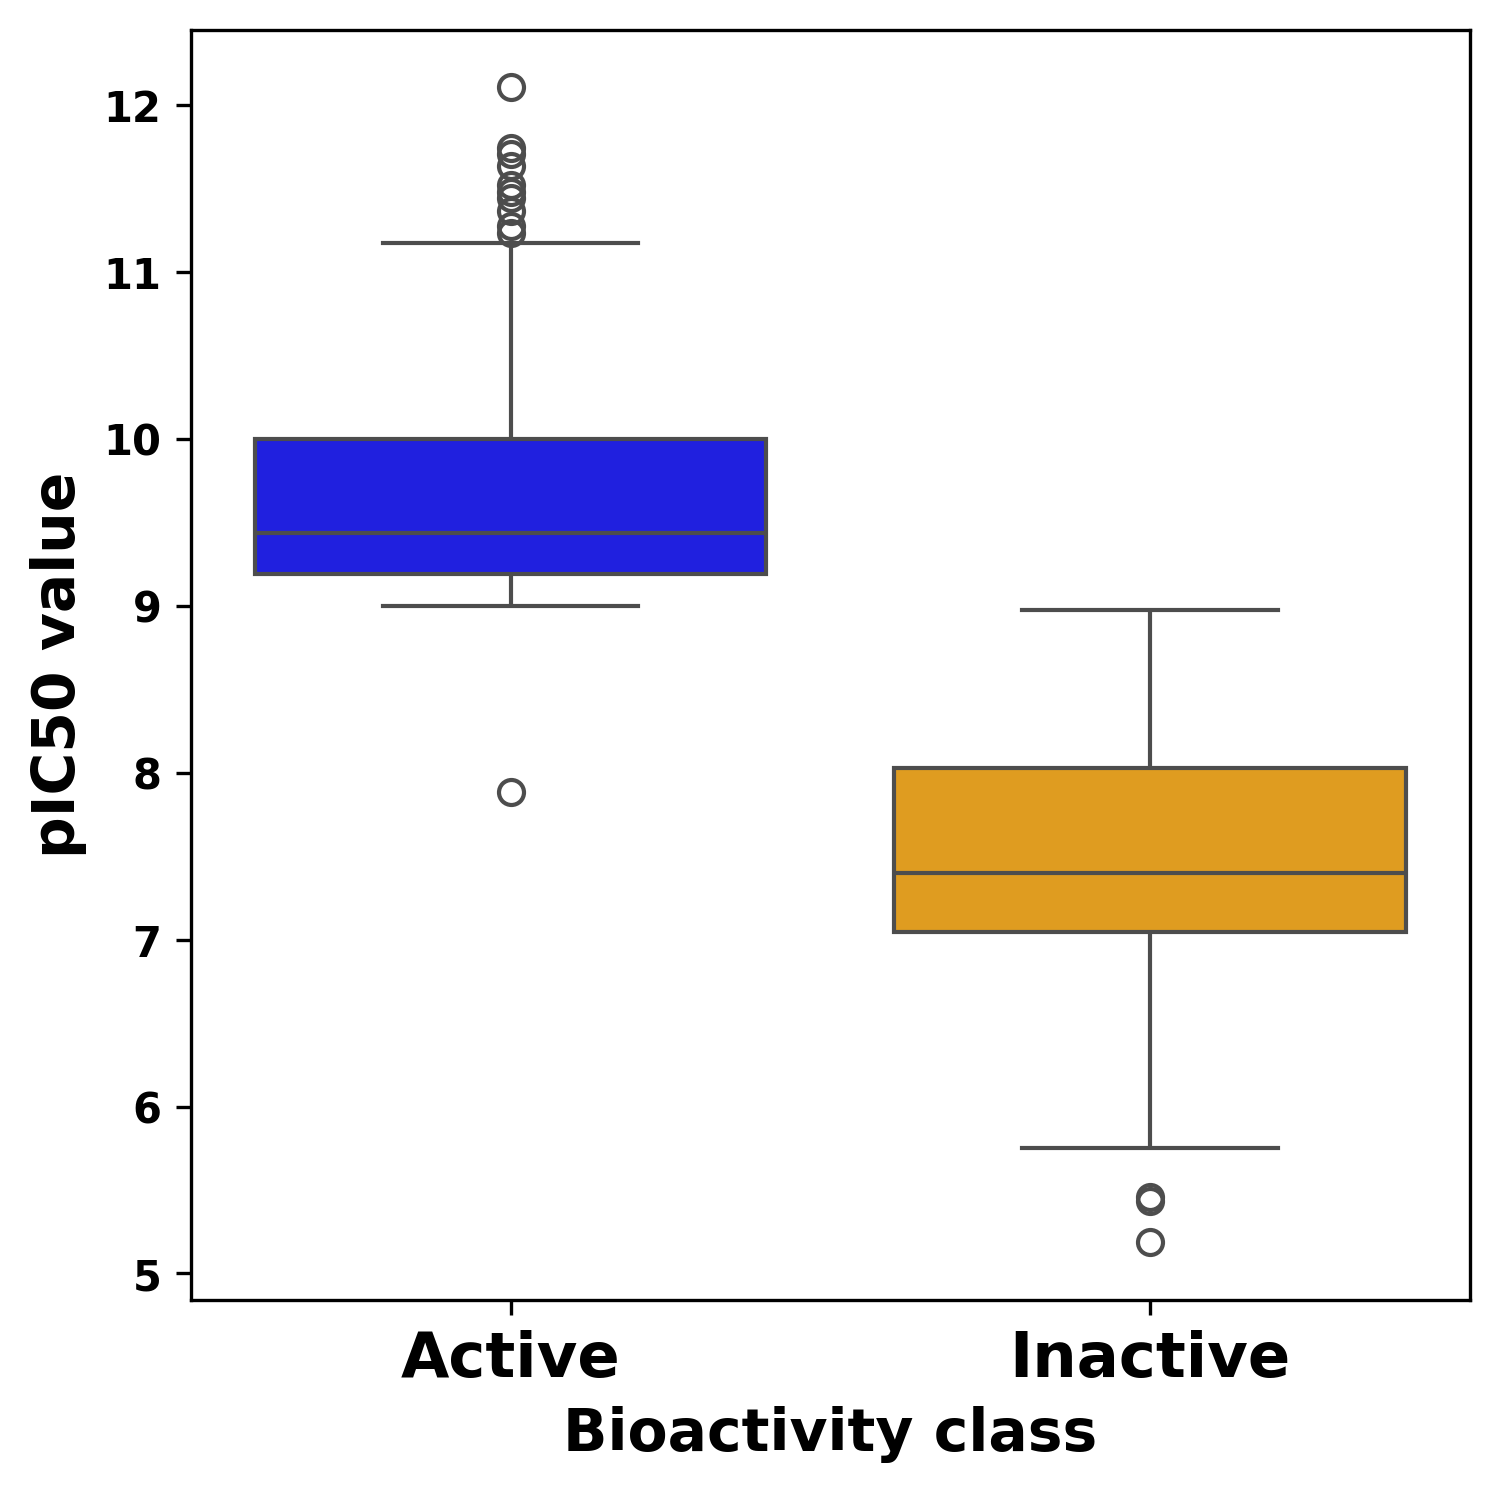

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
custom_palette = {"Active": "blue", "Inactive": "orange"}
sns.boxplot(x='Class', y='pIC50', data=df_2class, palette=custom_palette)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi'] = 300
plt.savefig('plot_ic50.pdf', format='pdf', bbox_inches='tight')
plt.show()


Statistical analysis | Mann-Whitney U Test

In [31]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  # seed the random number generator
  seed(1)

  # actives and inactives
  selection = [descriptor, 'Class']
  df = df_2class[selection]


  # Convert 'Class' column to lowercase for case-insensitive comparison
  df.loc[:, 'Class'] = df['Class'].str.lower()

  active = df[df['Class'] == 'active'][descriptor]
  inactive = df[df['Class'] == 'inactive'][descriptor]

  # Check if either group is empty and handle accordingly
  if active.empty or inactive.empty:
      print(f"Warning: One or both groups ('active', 'inactive') are empty for descriptor '{descriptor}'. Mann-Whitney U test cannot be performed.")
      return pd.DataFrame()  # Return an empty DataFrame

  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  alpha = 0.05
  if p > alpha:
      interpretation = 'Same distribution (fail to reject H0)'
  else:
      interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [32]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,111421.0,2.371902e-79,0.05,Different distribution (reject H0)


#*MW*

<ipython-input-33-029ef908d5ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='MW', data=df_2class, palette=custom_palette)


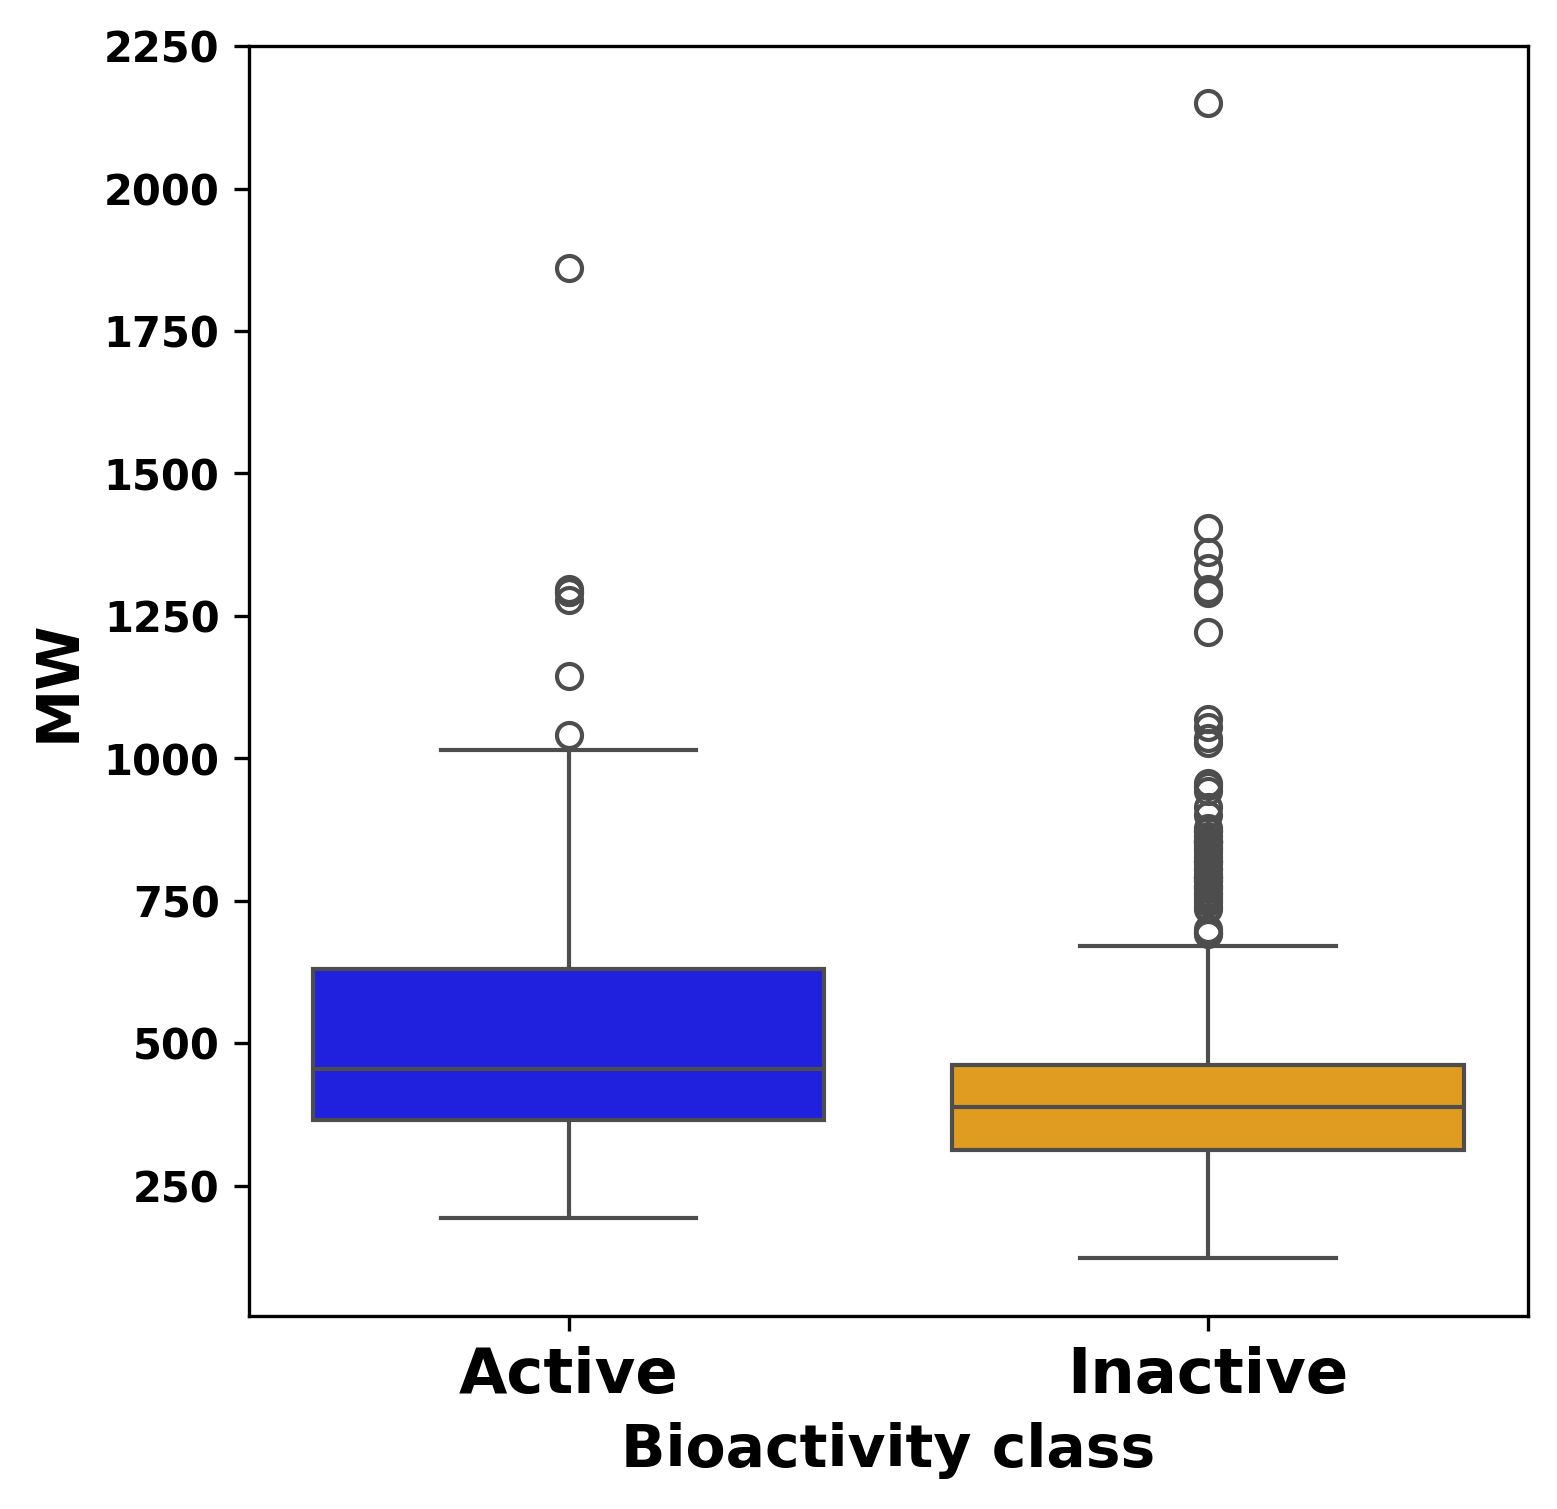

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
custom_palette = {"Active": "blue", "Inactive": "orange"}
sns.boxplot(x='Class', y='MW', data=df_2class, palette=custom_palette)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi'] = 300
plt.savefig('plot_MW.pdf', format='pdf', bbox_inches='tight')
plt.show()


#Statistical analysis | Mann-Whitney U Test

In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,72229.0,2.694571e-08,0.05,Different distribution (reject H0)


#LogP

<ipython-input-36-50799cc965e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='LogP', data=df_2class, palette=custom_palette)


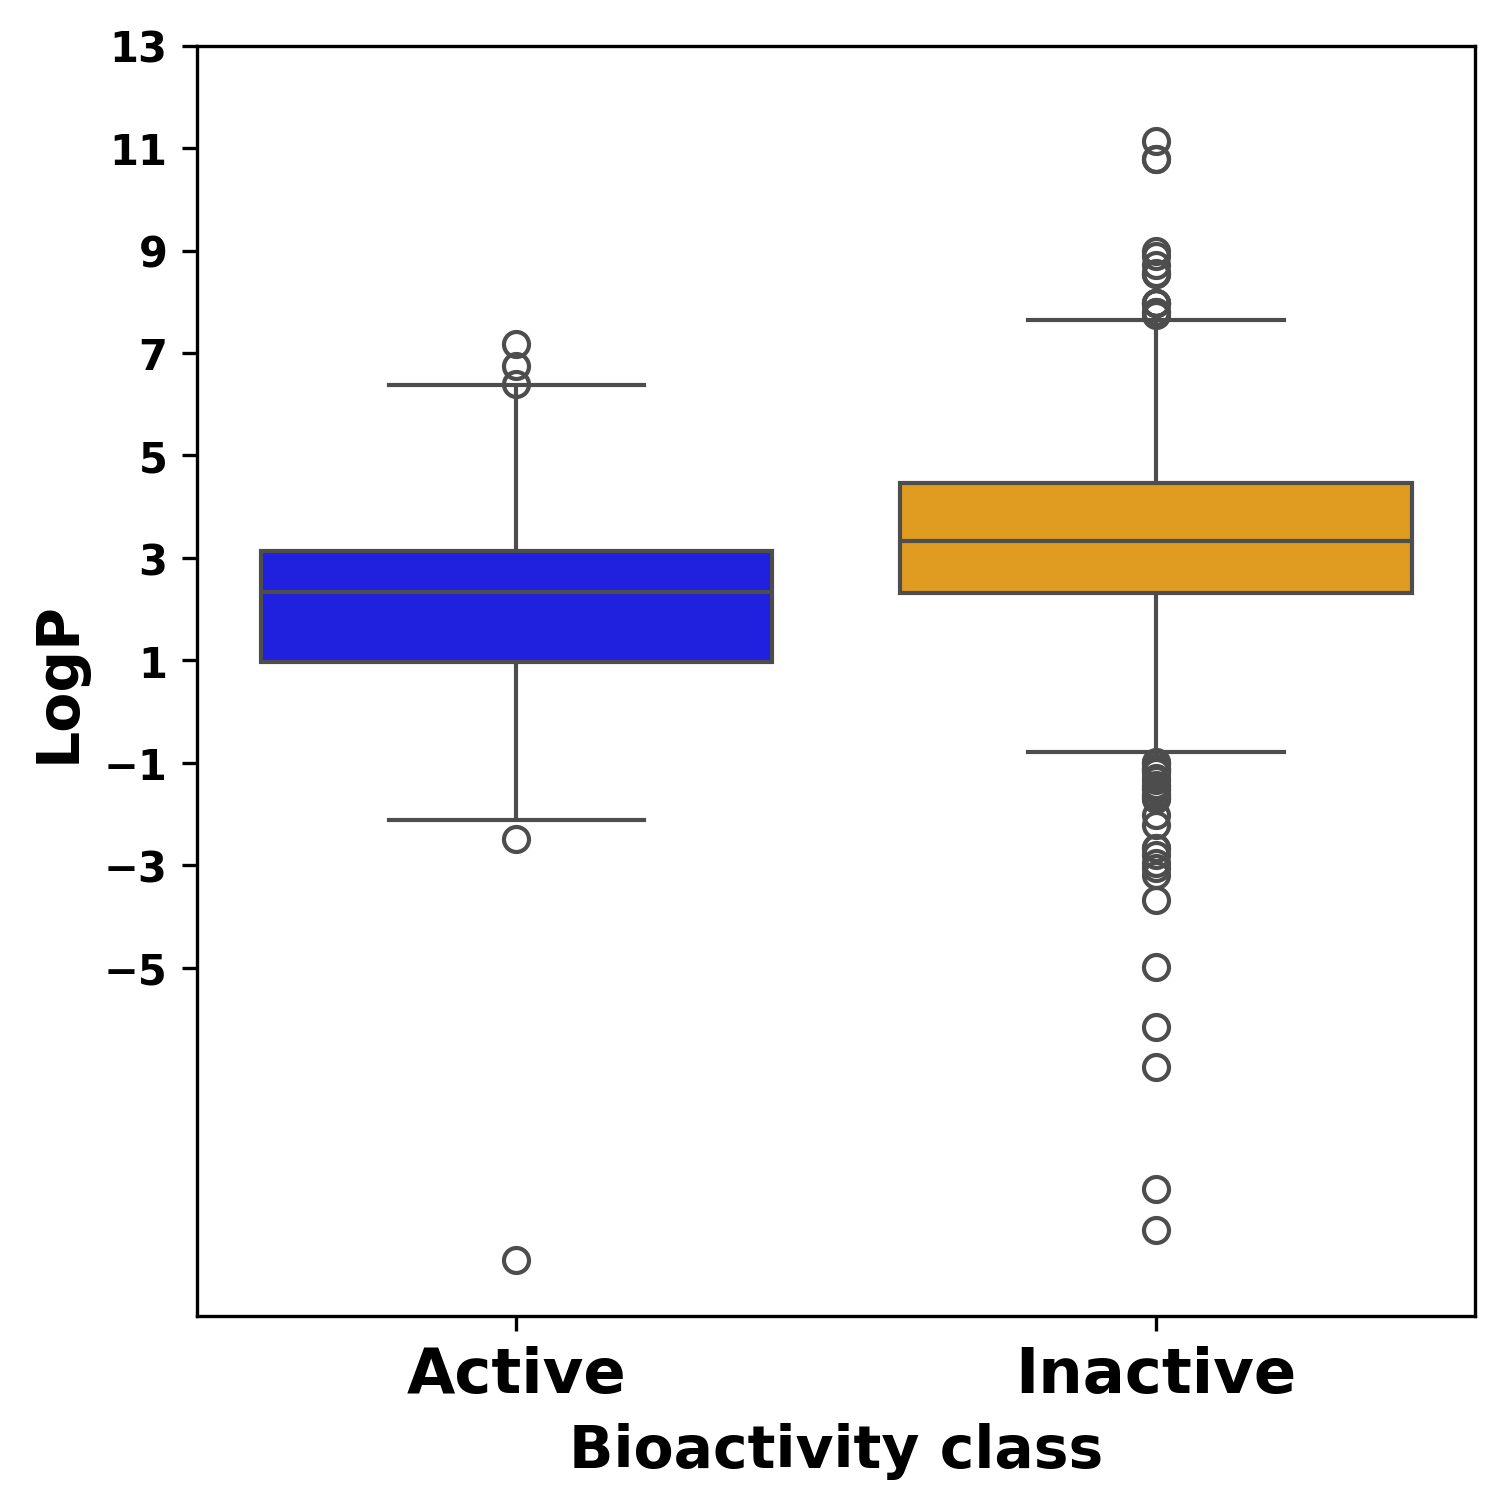

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
custom_palette = {"Active": "blue", "Inactive": "orange"}
sns.boxplot(x='Class', y='LogP', data=df_2class, palette=custom_palette)
listOf_yticks = np.arange(-5, 15, 2)
plt.yticks(listOf_yticks)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi'] = 300
plt.savefig('plot_LogP.pdf', format='pdf', bbox_inches='tight')
plt.show()


Statistical analysis | Mann-Whitney U Test

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,34577.0,5.566106e-13,0.05,Different distribution (reject H0)


#NumHDonors

<ipython-input-39-2b2038cd5393>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='NumHDonors', data=df_2class, palette=custom_palette)


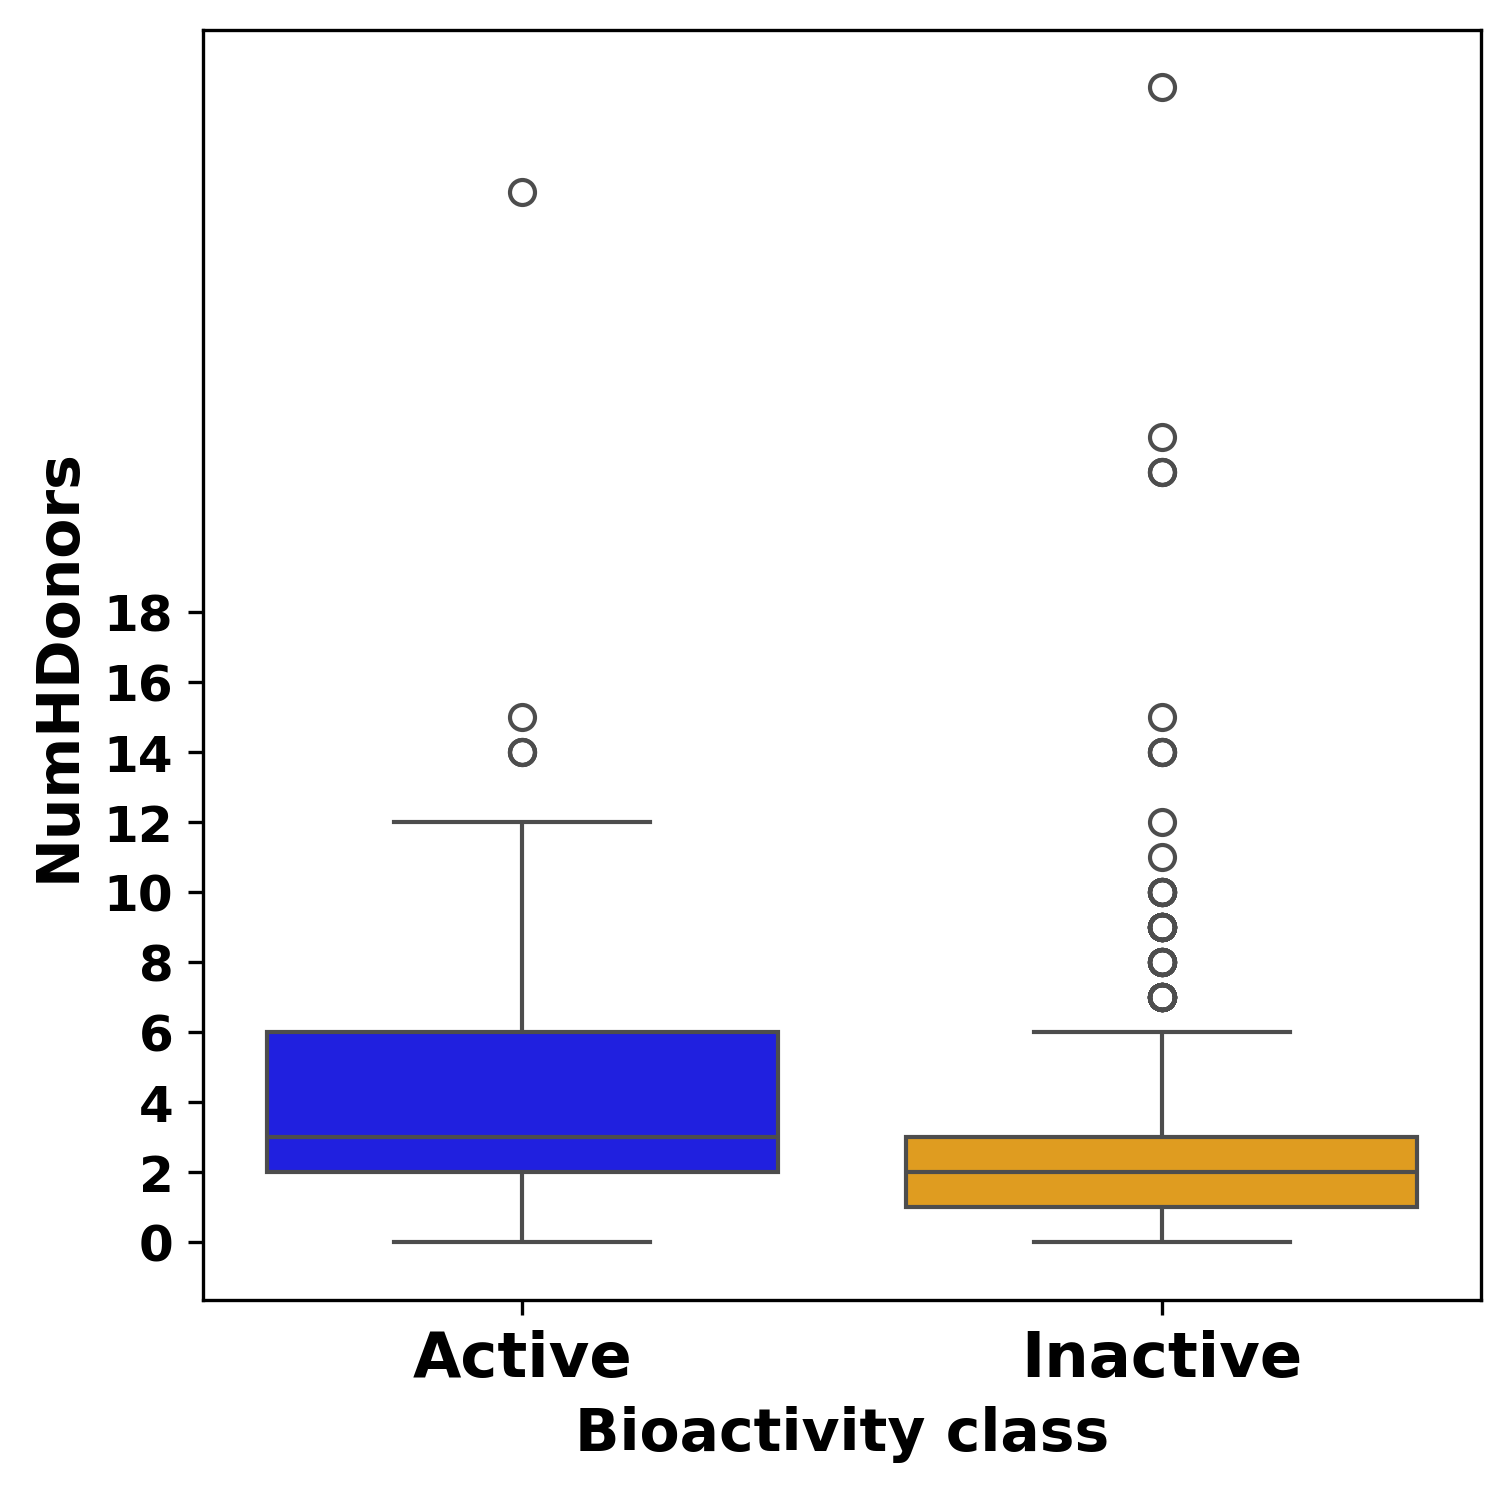

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
custom_palette = {"Active": "blue", "Inactive": "orange"}
sns.boxplot(x='Class', y='NumHDonors', data=df_2class, palette=custom_palette)
listOf_yticks = np.arange(0, 20, 2)
plt.yticks(listOf_yticks)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.savefig('plot_NumHDonors.pdf', format='pdf', bbox_inches='tight')
plt.show()


Statistical analysis | Mann-Whitney U Test

In [40]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,71052.5,1.350029e-07,0.05,Different distribution (reject H0)


#NumHAcceptors

<ipython-input-41-513b172196a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='NumHAcceptors', data=df_2class, palette=custom_palette)


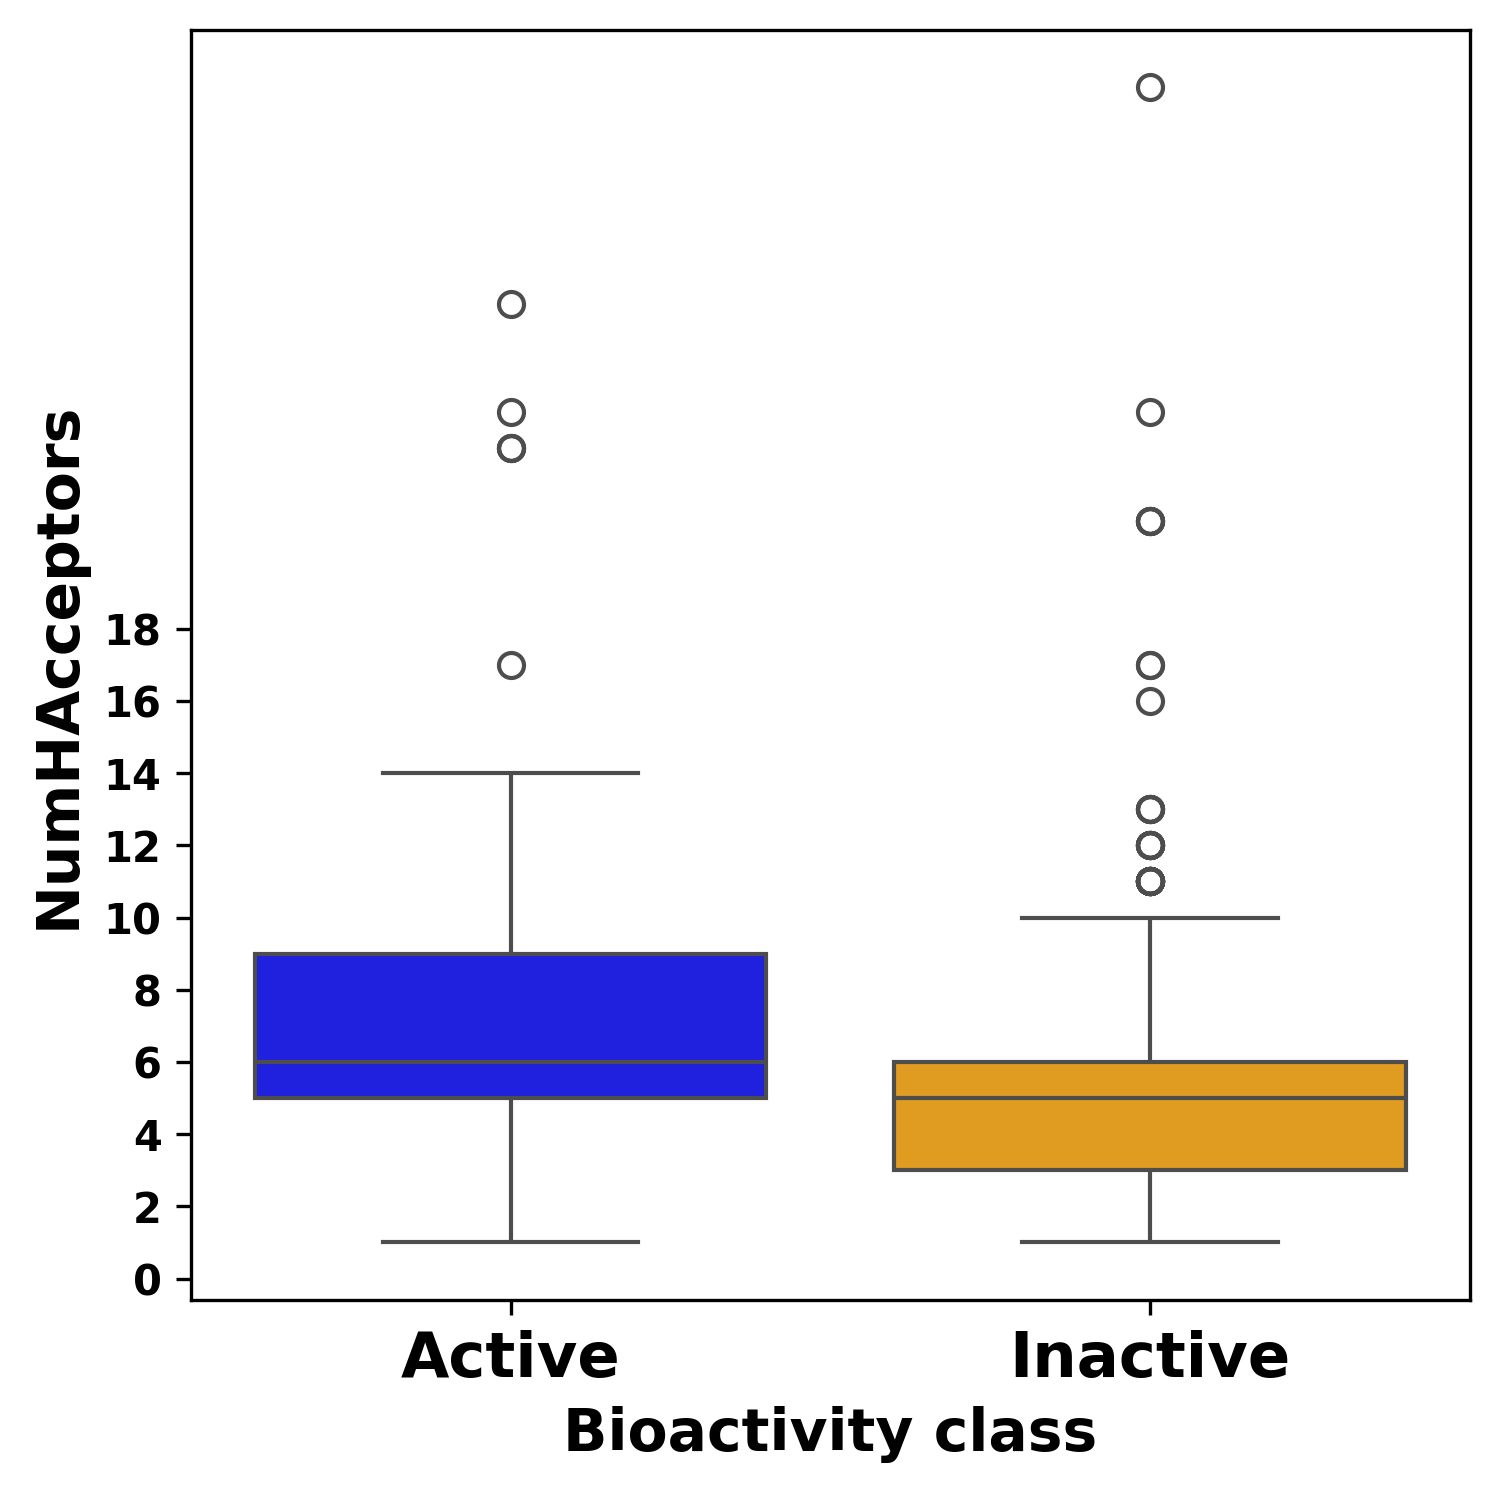

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(5.5, 5.5))
custom_palette = {"Active": "blue", "Inactive": "orange"}
sns.boxplot(x='Class', y='NumHAcceptors', data=df_2class, palette=custom_palette)
listOf_yticks = np.arange(0, 20, 2)
plt.yticks(listOf_yticks)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold')
plt.rcParams['figure.dpi'] = 300
plt.savefig('plot_NumHAcceptors.pdf', format='pdf', bbox_inches='tight')
plt.show()

Statistical analysis | Mann-Whitney U Test

In [42]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,74643.5,1.179373e-10,0.05,Different distribution (reject H0)


#Interpretation of Statistical Results
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values [Active: pIC50 ≥ 6 (IC50 ≤ 1 µM) and Inactive: pIC50 < 6 (IC50 > 1 µM)] were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [43]:
! zip SIRT1.zip *.csv *.jpeg

  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: SIRT1_03_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: SIRT1_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: SIRT1_05_bioactivity_data_tanimoto_similarity_matrix.csv (deflated 88%)
  adding: SIRT1_lipinski_grouped.csv (deflated 46%)
  adding: Distribution_of_pIC50_values.jpeg (deflated 57%)
  adding: SIRT1_lipinski_grouped.jpeg (deflated 52%)
  adding: tanimoto_similarity_histogram.jpeg (deflated 55%)


---